In [1]:
""" 
The algorithm is tested on the PDSystemEnv  gym task 
and developed with Tensorflow

Author: Daniel Salgado Rojo
"""

import tensorflow as tf
import numpy as np
import gym
import gym_pdsystem
from gym import wrappers
#import tflearn
import argparse
import pprint as pp

#from ddpg.replay_buffer import ReplayBuffer

from datetime import datetime

import random

from gym_pdsystem.envs.pdsystem_env import PDSystemEnv
import gym_pdsystem.utils.utilsq as ut
import gym_pdsystem.utils.constants as ct
import gym_pdsystem.utils.functions as fnc


from matplotlib import animation, rc
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import HTML


import pandas as pd
import time

from functools import partial

import os

#TO OMMIT WARNINGS
import warnings
warnings.filterwarnings('ignore')

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
simulations_directory = './simulations'
if not os.path.exists(simulations_directory):
    os.makedirs(simulations_directory)    

/home/dsalgador/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
simulation_id = 44

# Create directories for the simulations' outputs

simulation_directory = './simulations/simulation{}'.format(simulation_id)
rewards_file = simulation_directory+'/discrewards'+ '/rewards-sim{}.csv'.format(simulation_id)
states_file = simulation_directory+'/vis'+ '/states-sim{}.csv'.format(simulation_id) # for testing
models_dir = simulation_directory + '/NN-models'

if not os.path.exists(simulation_directory):
    os.makedirs(simulation_directory)
    os.makedirs(models_dir)
    os.makedirs(simulation_directory + '/discrewards')
    os.makedirs(simulation_directory + '/vis')
    
else:
    raise Exception("The simulation id you tried to use has been already used before. Try to change it to a new one.")

# Output headers to file
with open(rewards_file,'w') as f:
     np.savetxt(f, [["iteration", "discreward"]], fmt="%s", delimiter=',')

In [3]:
###########################################################
# Example n=5, k = 2

TANK_MAX_LOADS = np.array([100., 200, 100., 800., 200.])
LEVEL_PERCENTAGES = np.array([ #b , c, e
                                                [0.02, 0.31, 0.9],
                                                [0.01, 0.03, 0.9],
                                                [0.05, 0.16, 0.9],
                                                [0.07, 0.14, 0.85],
                                                [0.08, 0.26, 0.9]
                                                   ])

TRUCK_MAX_LOADS = np.array([70.,130.])

GRAPH_WEIGHTS = np.array([32., 159., 162., 156.,156., 0.])
DISCRETE = True

n = len(TANK_MAX_LOADS)
k = len(TRUCK_MAX_LOADS)
############################################################



# ###########################################################
# # Example n=9, k = 3

# TANK_MAX_LOADS = np.array([100., 200, 100., 800., 200., 500., 300., 800., 300.])
# LEVEL_PERCENTAGES = np.array([ #b , c, e
#                                                 [0.02, 0.31, 0.9],
#                                                 [0.01, 0.03, 0.9],
#                                                 [0.05, 0.16, 0.9],
#                                                 [0.07, 0.14, 0.85],
#                                                 [0.08, 0.26, 0.9],
#                                                 [0.02, 0.31, 0.9],
#                                                 [0.01, 0.03, 0.9],
#                                                 [0.05, 0.16, 0.9],
#                                                 [0.07, 0.14, 0.85]
#                                                    ])

# TRUCK_MAX_LOADS = np.array([70.,130.,250.])

# GRAPH_WEIGHTS = np.array([32., 159., 162., 156.,156., 32., 159., 162., 156., 0.])
# DISCRETE = True
# ############################################################



# ###########################################################
# 	# Example n=11, k = 3

# 	TANK_MAX_LOADS = np.array([100., 200, 100., 800., 200., 500., 300., 800., 300.,600.,900.])
# 	LEVEL_PERCENTAGES = np.array([ #b , c, e
# 	                                                [0.02, 0.31, 0.9],
# 	                                                [0.01, 0.03, 0.9],
# 	                                                [0.05, 0.16, 0.9],
# 	                                                [0.07, 0.14, 0.85],
# 	                                                [0.08, 0.26, 0.9],
# 	                                                [0.02, 0.31, 0.9],
# 	                                                [0.01, 0.03, 0.9],
# 	                                                [0.05, 0.16, 0.9],
# 	                                                [0.07, 0.14, 0.85],
# 	                                                [0.01, 0.03, 0.9],
# 	                                                [0.01, 0.03, 0.9]

# 	                                                   ])

# 	TRUCK_MAX_LOADS = np.array([70.,130.,250.])

# 	GRAPH_WEIGHTS = np.array([32., 159., 162., 156.,156., 32., 159., 162., 156.,150.,150., 0.])
# 	DISCRETE = True
# 	############################################################
    
    
# ###########################################################
# # Example n=12, k = 3

# TANK_MAX_LOADS = np.array([100., 200, 100., 800., 200., 500., 300., 800., 300.,600.,900.,700.])
# LEVEL_PERCENTAGES = np.array([ #b , c, e
#                                                 [0.02, 0.31, 0.9],
#                                                 [0.01, 0.03, 0.9],
#                                                 [0.05, 0.16, 0.9],
#                                                 [0.07, 0.14, 0.85],
#                                                 [0.08, 0.26, 0.9],
#                                                 [0.02, 0.31, 0.9],
#                                                 [0.01, 0.03, 0.9],
#                                                 [0.05, 0.16, 0.9],
#                                                 [0.07, 0.14, 0.85],
#                                                 [0.01, 0.03, 0.9],
#                                                 [0.01, 0.03, 0.9],
#                                                 [0.07, 0.14, 0.85]


#                                                    ])

# TRUCK_MAX_LOADS = np.array([70.,130.,250.])

# GRAPH_WEIGHTS = np.array([32., 159., 162., 156.,156., 32., 159., 162., 156.,150.,150.,150., 0.])
# DISCRETE = True
# ############################################################

# ###########################################################
# # Example n=12, k = 4

# TANK_MAX_LOADS = np.array([100., 200, 100., 800., 200., 500., 300., 800., 300.,600.,900.,700.])
# LEVEL_PERCENTAGES = np.array([ #b , c, e
#                                                 [0.02, 0.31, 0.9],
#                                                 [0.01, 0.03, 0.9],
#                                                 [0.05, 0.16, 0.9],
#                                                 [0.07, 0.14, 0.85],
#                                                 [0.08, 0.26, 0.9],
#                                                 [0.02, 0.31, 0.9],
#                                                 [0.01, 0.03, 0.9],
#                                                 [0.05, 0.16, 0.9],
#                                                 [0.07, 0.14, 0.85],
#                                                 [0.01, 0.03, 0.9],
#                                                 [0.01, 0.03, 0.9],
#                                                 [0.07, 0.14, 0.85]


#                                                    ])

# TRUCK_MAX_LOADS = np.array([70.,130.,250., 200.])

# GRAPH_WEIGHTS = np.array([32., 159., 162., 156.,156., 32., 159., 162., 156.,150.,150.,150., 0.])
# DISCRETE = True
# ############################################################


env = gym.make("PDSystemEnv-v0")
episode_length = 30
env._max_episode_steps = episode_length



In [4]:
def int_to_action(int_action: int, env):
    """
    So far assumed k = 2, 3 or 4:
    
    Converts an integer between 0 and env.action_space.shape[1]**env.action_space.shape[0]
    which is (n+1)^k where n is the number of tanks and k the number of trucks.
    
    return vect_action: a k-dimensional vector with components in the range 0,...n. 
    For k = 2, vect_action = [i,j] is the action of truck 1 going to tank i and truck 2 going to tank j.
    (i, j = n means staying at the depot, 0,....,n-1 are the real tanks).
    The associated integer is i*(n+1) + j
    
    For k = 3, vect_action = [i,j,l] is the action of truck 1 going to tank i, truck 2 going to tank j,
    and truck 3 going to tank l.
    (i, j, l = n means staying at the depot, 0,....,n-1 are the real tanks).
    The associated integer is (i*(n+1) + j)*(n+1) + l
    
    For k = 4, vect_action = [i,j,l,m] is the action of truck 1 going to tank i, truck 2 going to tank j,
    truck 3 going to tank l and truck 4 going to tank m.
    (i, j, l, m = n means staying at the depot, 0,....,n-1 are the real tanks).
    The associated integer is ((i*(n+1) + j)*(n+1) + l)*(n+1) + m

    """
    nplus1 = env.action_space.shape[1]
    k = env.action_space.shape[0]
    n_actions = nplus1**k
    
    if k == 2:
        j = int_action % nplus1
        i = int((int_action-j)/nplus1)
        vect_action = np.array([i,j])
      
    elif k == 3:
        l = int_action % nplus1
        ij = int( (int_action - l)/nplus1 ) 
        j = ij % nplus1
        i = int((ij-j)/nplus1)
        vect_action = np.array([i,j,l])
        
    elif k == 4:
        m = int_action % nplus1
        ml = int((int_action - m)/nplus1)
        l = ml % nplus1
        ij = int((ml-l)/nplus1) 
        j = ij % nplus1
        i = int((ij-j)/nplus1)
        vect_action = np.array([i,j,l,m])
    
    else:
        raise ValueError("The number of trucks k of the environment is different from 2, 3 or 4")
    return vect_action

def action_to_int(vect_action: np.array, env):
    """
    Assumed k = 2,3 or 4, so vect_action has 2, 3 or components respectively.
    """
    nplus1 = env.action_space.shape[1]
    k = env.action_space.shape[0]
    if k == 2:
        int_action = vect_action[0] * nplus1 + vect_action[1]
    elif k == 3:
        int_action = (vect_action[0] * nplus1 + vect_action[1])*nplus1 + vect_action[2]
    elif k == 4:
        int_action = ((vect_action[0] * nplus1 + vect_action[1])*nplus1 + vect_action[2])*nplus1 + vect_action[3] 
    else:
        raise ValueError("The number of trucks k of the environment is different from 2, 3 or 4")

    return int_action
    

In [5]:
int_action = 35
print(int_action)
vect_action = int_to_action(int_action,env)
print(vect_action)
int_action = action_to_int(vect_action,env)
print(int_action)

35
[5 5]
35


In [6]:
"""
From https://github.com/ageron/handson-ml 
"""

def discount_rewards(rewards, discount_rate):
    discounted_rewards = np.zeros(len(rewards))
    cumulative_rewards = 0
    for step in reversed(range(len(rewards))):
        cumulative_rewards = rewards[step] + cumulative_rewards * discount_rate
        discounted_rewards[step] = cumulative_rewards
    return discounted_rewards

def normalize_rewards(all_discounted_rewards): #, discount_rate):
    #all_discounted_rewards = [discount_rewards(rewards, discount_rate) for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean)/reward_std for discounted_rewards in all_discounted_rewards]

In [7]:
reset_graph()

# TensorBoard summary directories
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)   


seed = 42
np.random.seed(seed)

learning_rate = 0.01 #0.01

hidden1_neurons = 100 #100
hidden2_neurons = 50 #50

batch_normalization = True  
batch_norm_momentum = 0.9


tf.set_random_seed(seed)

with tf.name_scope("dnn"):
        
            # 1. Parameters to determine the NN architecture

            n_inputs = env.observation_space.shape[1]
            n_hidden1 = hidden1_neurons; activation1 = tf.nn.sigmoid#tf.nn.elu
            n_hidden2 = hidden2_neurons; activation2 = tf.nn.sigmoid#tf.nn.elu
            n_outputs = env.action_space.shape[1]**env.action_space.shape[0]
            
            he_init = tf.contrib.layers.variance_scaling_initializer(seed = seed)

            # 2. Build the Neural Network
#             training = tf.placeholder_with_default(False, shape=(), name='training')

            
#             my_batch_norm_layer = partial(
#                                             tf.layers.batch_normalization,
#                                             training=training,
#                                             momentum=batch_norm_momentum)

#             my_dense_layer = partial(
#                                         tf.layers.dense,
#                                         kernel_initializer=he_init)


            X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = "X")
            
            
#             hidden1 = my_dense_layer(X, n_hidden1, name = "hidden1")
#             bn1 = activation1(my_batch_norm_layer(hidden1))
#             hidden2 = my_dense_layer(bn1, n_hidden2, name = "hidden2")
#             bn2 = activation2(my_batch_norm_layer(hidden2))

            
            hidden1 = tf.layers.dense(X, n_hidden1, activation = activation1,
                                     kernel_initializer = he_init)
            hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = activation2,
                                     kernel_initializer = he_init)
            logits = tf.layers.dense(hidden2, n_outputs, name = "logits")#,kernel_initializer = initializer)
            
            outputs = tf.nn.softmax(logits)
                   
            
with tf.name_scope("action"):
            # 3. Select a random action (where to go) based on the estimated probabilities
            action = tf.multinomial(tf.log(outputs), num_samples = 1)
            test_action = tf.argmax(outputs, axis = 1)
  
            y = tf.reshape(action, [1])
            
with tf.name_scope("loss"):
            xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y,logits = logits)
            print(logits.shape)
            print(xentropy.shape)
#             xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels = y,
#                                                                       logits = logits)
            loss = tf.reduce_mean(xentropy, name = "loss")
            
tf.summary.scalar('average_cross_entropy', loss)


with tf.name_scope("train"):
            # Optimization Op
            optimizer = tf.train.AdamOptimizer(learning_rate)
            #optimize = optimizer.minimize(loss)
            
            grads_and_vars = optimizer.compute_gradients(xentropy)
            gradients = [grad for grad, variable in grads_and_vars]
            gradient_placeholders = []
            grads_and_vars_feed = []
            for grad, variable in grads_and_vars:
                gradient_placeholder = tf.placeholder(tf.float32, shape=grad.get_shape())
                gradient_placeholders.append(gradient_placeholder)
                grads_and_vars_feed.append((gradient_placeholder, variable))
            training_op = optimizer.apply_gradients(grads_and_vars_feed)
                        
# # with tf.name_scope("eval"):
# #             correct = tf.nn.in_top_k(logits, y, 1)
# #             accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
# # tf.summary.scalar('accuracy', accuracy)

#Extra summary scalars
# avg_disc_reward_per_game = tf.placeholder(tf.float32, name = "avg_disc_reward")
# reward_placeholder = tf.placeholder(tf.float32, name = "reward_placeholder")
# avg_disc_reward_per_game = tf.Variable(0.0,dtype = tf.float32, name = "avg_disc_reward")

# tf.summary.scalar("Average_Discounted_Reward_per_game", avg_disc_reward_per_game)
                                       
merged = tf.summary.merge_all()
init = tf.global_variables_initializer()
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())
        
saver = tf.train.Saver()
        
    

Instructions for updating:
Use the retry module or similar alternatives.
(?, 36)
(1,)


In [8]:
# File names for the model

model_file = models_dir + "/pdenv_policy_net_pg.ckpt"#.format(learning_rate)
best_model_file = models_dir + "/pdenv_best_policy_net_pg.ckpt"#.format(learning_rate)

graph_file =  '{}.meta'.format(model_file)


# Simulation / Training parameters
n_games_per_update = 10
n_max_steps = episode_length
n_iterations = 500 #2*10**4
save_iterations = 100 # USEFUL WHEN USING EARLY STOPPING
discount_rate = 0.9


info_freq = 100 #100
round_time = 2
round_reward = 6
#avg_rewards_list = []
summary_freq = 20#int(info_freq/2), 10

# Early stopping
max_checks_without_progress = np.inf # 10,  one for each "info_freq" (in terms of iterations it would be
                                                            #max_checks_without_progress *  info_freq)
checks_without_progress = 0
best_reward = -np.infty


retrain = False
###########################

with tf.Session() as sess:
    
    #train_writer = tf.summary.FileWriter(logdir + '/pgtrain', sess.graph)
    if retrain:
        saver.restore(sess, model_file)
        
    summary2 = tf.Summary()
    if not retrain:
        init.run()
    time_start = time.time()

    for iteration in range(n_iterations+1):
        print("\rIteration: {}".format(iteration), end="")
        all_rewards = []
        all_gradients = []
        for game in range(n_games_per_update):
            current_rewards = []
            current_gradients = []
            obs = env.reset()
            for step in range(n_max_steps):
                action_val, gradients_val = sess.run([action, gradients], feed_dict={X: obs.reshape(1, n_inputs)}) 
                #print(action_val)
                vect_action = int_to_action(action_val,env) #HERE WE CONVERT FROM INTEGER TO ACTION's Array
                #print(vect_action)
                obs, reward, done, info = env.step(vect_action)
                current_rewards.append(reward)
                current_gradients.append(gradients_val)                
                
                if done:
                    break
            all_rewards.append(current_rewards)
            all_gradients.append(current_gradients)
            
        
        all_disc_rewards =  [discount_rewards(rewards, discount_rate) for rewards in all_rewards]
        all_disc_norm_rewards = normalize_rewards(all_disc_rewards)     

        feed_dict = {}
        for var_index, gradient_placeholder in enumerate(gradient_placeholders):
            mean_gradients = np.mean([reward * all_gradients[game_index][step][var_index]
                                      for game_index, rewards in enumerate(all_disc_norm_rewards)
                                          for step, reward in enumerate(rewards)], axis=0)
            feed_dict[gradient_placeholder] = mean_gradients
         
       
        #tf.summary.scalar('avg_rewards', avg_rewards)
        #train_writer.add_summary(avg_rewards, iteration)

        # Summary and info printings     ###################################################################
        if iteration % info_freq == 0 or iteration % summary_freq == 0:  
            
            #avg_rewards =np.array([np.mean(np.array(all_rewards)) / n_games_per_update])
            avg_rewards =np.mean(np.array(all_disc_rewards)) / n_games_per_update
#             print(avg_rewards)
            #avg_rewards_list.append(avg_rewards)
            if iteration % summary_freq == 0:
                summary2.value.add(tag='average_reward_per_game', simple_value = avg_rewards)
                file_writer.add_summary(summary2, iteration)

                feed_dict[X] = obs.reshape(1, n_inputs)
                summary = sess.run(merged, feed_dict= feed_dict)

                file_writer.add_summary(summary, iteration)
                
                  # Disc rewards, etc ####
       
                with open(rewards_file,'ab') as f:
                            np.savetxt(f, [np.array([iteration,  avg_rewards])], fmt=("%d",'%.10f'), delimiter=',') 

            if iteration % info_freq == 0:
                time_end = time.time()
                print(". Average reward per game: ",  round(avg_rewards, round_reward), 
                      ", Elapsed time ", round( (time_end-time_start)/60., round_time), " minutes.") 
                
                
        ###########################################################################3
        
      
                
        if avg_rewards > best_reward:
                    saver.save(sess, best_model_file)
                    print("Saved Model with average discounted rewards per game ", avg_rewards)
                    best_reward = avg_rewards
                    checks_without_progress = 0
        else:
                    checks_without_progress += 1
                    if checks_without_progress > max_checks_without_progress:
                        print("Early stopping!")
                        break
        ####################################################################################################
        if iteration % save_iterations == 0:
                 saver.save(sess, model_file)
        
        sess.run(training_op, feed_dict=feed_dict)
    
    #saver.save(sess, model_file + "final")
    file_writer.flush()
    file_writer.close()
                 
    time_end = time.time()
    print("Simulation finished. Elapsed time ", round( (time_end-time_start)/60., round_time), " minutes.") 
        

Iteration: 0. Average reward per game:  -1.816997 , Elapsed time  0.0  minutes.
Saved Model with average discounted rewards per game  -1.8169967731258212
Iteration: 20Saved Model with average discounted rewards per game  -0.8271317752062393
Iteration: 60Saved Model with average discounted rewards per game  -0.5375936148809235
Iteration: 80Saved Model with average discounted rewards per game  -0.40398290343913584
Iteration: 100. Average reward per game:  -0.29625 , Elapsed time  0.47  minutes.
Saved Model with average discounted rewards per game  -0.29624962092864815
Iteration: 200. Average reward per game:  -0.279206 , Elapsed time  0.97  minutes.
Saved Model with average discounted rewards per game  -0.2792064885422475
Iteration: 220Saved Model with average discounted rewards per game  -0.24126699648925537
Iteration: 280Saved Model with average discounted rewards per game  -0.23099349124697013
Iteration: 300. Average reward per game:  -0.139774 , Elapsed time  1.46  minutes.
Saved Mod

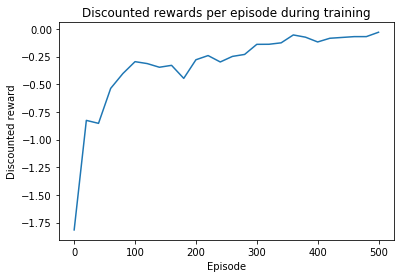

In [9]:
# Visualizing train simulation:

#episode =episodes
#simulation_id = 2
#step = 30

discrewards = pd.read_table(rewards_file, sep = ",")

indices = [i for i in range(0,n_iterations,1)]

plt.plot(discrewards['iteration'][indices],discrewards['discreward'][indices], label = "Discounted rewards")
plt.title("Discounted rewards per episode during training")
plt.xlabel("Episode")
plt.ylabel("Discounted reward")

plt.show()
plt.close()

## PLAY:

In [10]:
seed = 45
np.random.seed(seed)

frames = []
n_episodes = 1

system = PDSystemEnv()
#model_file = "pdenv_policy_net_pg.ckpt"
test_model_file = model_file

with open(states_file,'w') as f:
         np.savetxt(f, [["step", "stock0", "stock1", "stock2","stock3", "stock4"]], fmt="%s", delimiter=',') 


with tf.Session() as sess:
        sess.run(init)
        saver.restore(sess, test_model_file)
        for episode in range(n_episodes):
            state = env.reset()
            for step in range(episode_length):
                system.state = state
                with open(states_file,'ab') as f:
                    np.savetxt(f, [np.array([(episode)*(episode_length)+step]+state.tolist())], fmt=("%d",'%.3f','%.3f','%.3f','%.3f','%.3f'), delimiter=',') 
                img = system.visualize()
                frames.append(img)

                action_val = test_action.eval(feed_dict={X: state.reshape(1, n_inputs)})
                #print(action_val)
                vect_action = int_to_action(action_val,env) #HERE WE CONVERT FROM INTEGER TO ACTION's Array
                #print(vect_action)
                state, reward, done, info = env.step(vect_action)
                #print(state)
                #print(action_val[0],emptiest_tank_policy(state, system))
        env.close()
    

INFO:tensorflow:Restoring parameters from ./simulations/simulation44/NN-models/pdenv_policy_net_pg.ckpt


In [11]:
test_anim = ut.create_system_animation(frames, n_episodes * episode_length)
plt.close()

HTML(test_anim.to_html5_video())

In [12]:
def visualize_simulation(states_file,
                        test_toy_system,
                        simulation_id,
                        simulation_directory):
    test_states = pd.read_table(states_file, sep = ",")
    test_states.head()


    cmap = plt.get_cmap('gnuplot')
    colors = [cmap(i) for i in np.linspace(0, 1, n)]
    lvl_colors = ["Orange", "Green","Orange"]

    #tanks = test_toy_system.tanks
    tanks_max_load = system.tank_max_loads
    level_percentages = system.load_level_percentages

    for i, color in enumerate(colors, start=1):    
        plt.subplot(2,3,i)
        states = test_states['stock{}'.format(i-1)]
        plt.plot(test_states['step'],states, label = "Shop {}".format(i-1), color = "Black")
        plt.title("Shop {}".format(i-1))

        plt.axhline(y= tanks_max_load[i-1], xmin=0, xmax=episode_length, hold=None, color = "Red", linestyle = '--')
        for lvl_color, lvl in zip(lvl_colors, level_percentages[i-1]):
            plt.axhline(y= lvl * tanks_max_load[i-1], xmin=0, xmax=episode_length, hold=None, color = lvl_color, 
                        linestyle = '--')
        plt.axhline(y= 0, xmin=0, xmax=episode_length, hold=None, color = "Red", linestyle = '--')


        percentages = level_percentages[i-1]           
        c = percentages[1]
        e = percentages[2]          
        d = ct.p0_GLOBAL*e+(1-ct.p0_GLOBAL)*c
        plt.axhline(y= d*tanks_max_load[i-1], xmin=0, xmax=episode_length, hold=None, color = "lawngreen", 
                    linestyle = '-.')

        plt.axhline(y= np.mean(states), xmin=0, xmax=episode_length, hold=None, 
                    color = "blue", linestyle = '-.')
        plt.xticks(range(0,episode_length*n_episodes+1,5*n_episodes
                        ))


    plt.subplot(2,3,6)
    plt.title("Legend")
    plt.axis('off')

    #plt.legend(bbox_to_anchor=(0.5 ,0.8), loc=2, borderaxespad=0.)
    plt.yticks([])
    plt.xticks([])

    patch1 = mpatches.Patch(color='red', label='Max/Min capacities', linestyle = '--', fill = False, linewidth = 2)
    patch2 = mpatches.Patch(color='orange', label='Max/Min levels', linestyle = '--', fill = False, linewidth = 2)
    patch3 = mpatches.Patch(color='green', label='Danger level', linestyle = '--', fill = False, linewidth = 2)
    patch4 = mpatches.Patch(color='lawngreen', label='Max reward level (M)', linestyle = '-.', fill = False, linewidth = 2)
    patch5 = mpatches.Patch(color='blue', label='Observed mean level', linestyle = '-.', fill = False, linewidth = 2)
    patch6 = mpatches.Patch(color='black', label='Current stock level', linestyle = '-', fill = False, linewidth = 2)


    plt.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6], loc = 'center')

    plt.tight_layout() 
    plt.savefig(simulation_directory + '/tank-levels-sim' + '{}'.format(simulation_id) + '.pdf')
    plt.show()
    plt.close()

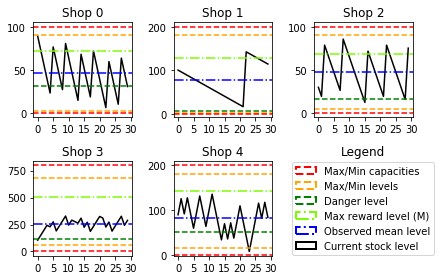

In [13]:
visualize_simulation(states_file,
                        system,
                        simulation_id,
                        simulation_directory)   

In [14]:
# plt.close()

# #THE REAL LEVELS (percentages 12h, 36h, ? h)
# tank_levels = [frames[i][2] for i in range(len(frames))]
# tank_levels_array = np.asarray(tank_levels).transpose()

# n = system.n

# cmap = plt.get_cmap('gnuplot')
# colors = [cmap(i) for i in np.linspace(0, 1, n)]
# lvl_colors = ["Orange", "Green","Orange"]

# tanks_max_load = system.tank_max_loads
# level_percentages = system.load_level_percentages

# for i, color in enumerate(colors, start=1):
#     plt.subplot(4,3, i)    

#     plt.plot(tank_levels_array[i-1], color=color, label='Tank ${i}$'.format(i=i))
    
#     plt.axhline(y= tanks_max_load[i-1], xmin=0, xmax=episode_length, hold=None, color = "Red", linestyle = '--')
#     for lvl_color, lvl in zip(lvl_colors, level_percentages[i-1]):
#         plt.axhline(y= lvl * tanks_max_load[i-1], xmin=0, xmax=episode_length, hold=None, color = lvl_color, 
#                     linestyle = '--')
#     plt.axhline(y= 0, xmin=0, xmax=episode_length, hold=None, color = "Red", linestyle = '--')
    
    
#     percentages = level_percentages[i-1]           
#     c = percentages[1]
#     e = percentages[2]          
#     d = ct.p0_GLOBAL*e+(1-ct.p0_GLOBAL)*c
#     plt.axhline(y= d*tanks_max_load[i-1], xmin=0, xmax=episode_length, hold=None, color = "lawngreen", 
#                 linestyle = '-.')

#     plt.axhline(y= np.mean(tank_levels_array[i-1]), xmin=0, xmax=episode_length, hold=None, 
#                 color = "blue", linestyle = '-.')
    
#     plt.legend(loc='best')
# plt.show()


In [15]:
int_to_action(3,env)

array([0, 3])

In [16]:
if 1 == 2 or 1 == 0:
    print(2)

In [17]:
np.inf


inf

In [18]:
a = np.array([1,2,3,2,2])

In [19]:
a[0]

1

In [20]:
print(a.tolist())

[1, 2, 3, 2, 2]


In [21]:
w = np.array([1,2,3,4])

In [22]:
w[[1,2]]

array([2, 3])

Iteration: 0. Average reward per game:  -1.937177 , Elapsed time  0.01  minutes.
Saved Model with average discounted rewards per game  -1.9371774844162275
Iteration: 20Saved Model with average discounted rewards per game  -0.9706484292856778
Iteration: 40Saved Model with average discounted rewards per game  -0.7654785649834133
Iteration: 60Saved Model with average discounted rewards per game  -0.5995210797681685
Iteration: 80Saved Model with average discounted rewards per game  -0.4327503840177901
Iteration: 100. Average reward per game:  -0.386753 , Elapsed time  0.66  minutes.
Saved Model with average discounted rewards per game  -0.3867534294308506
Iteration: 120Saved Model with average discounted rewards per game  -0.35601938508922715
Iteration: 140Saved Model with average discounted rewards per game  -0.27318779173276975
Iteration: 160Saved Model with average discounted rewards per game  -0.23106525838237135
Iteration: 200. Average reward per game:  -0.20511 , Elapsed time  1.31  minutes.
Saved Model with average discounted rewards per game  -0.2051098850535659
Iteration: 220Saved Model with average discounted rewards per game  -0.19273440501698522
Iteration: 240Saved Model with average discounted rewards per game  -0.17994594949574835
Iteration: 300. Average reward per game:  -0.202603 , Elapsed time  1.96  minutes.
Iteration: 400. Average reward per game:  -0.15286 , Elapsed time  2.61  minutes.
Saved Model with average discounted rewards per game  -0.15285980174208236
Iteration: 420Saved Model with average discounted rewards per game  -0.14959204211641602
Iteration: 500. Average reward per game:  -0.180208 , Elapsed time  3.26  minutes.
Iteration: 600. Average reward per game:  -0.164707 , Elapsed time  3.92  minutes.
Iteration: 700. Average reward per game:  -0.204476 , Elapsed time  4.56  minutes.
Iteration: 720Saved Model with average discounted rewards per game  -0.14724224064318006
Iteration: 800. Average reward per game:  -0.182793 , Elapsed time  5.21  minutes.
Iteration: 900. Average reward per game:  -0.137978 , Elapsed time  5.89  minutes.
Saved Model with average discounted rewards per game  -0.13797844973419546
Iteration: 1000. Average reward per game:  -0.14535 , Elapsed time  6.57  minutes.
Iteration: 1060Saved Model with average discounted rewards per game  -0.13583961971086284
Iteration: 1100. Average reward per game:  -0.134264 , Elapsed time  7.29  minutes.
Saved Model with average discounted rewards per game  -0.13426393970402908
Iteration: 1200. Average reward per game:  -0.175209 , Elapsed time  8.0  minutes.
Iteration: 1300. Average reward per game:  -0.135512 , Elapsed time  8.71  minutes.
Iteration: 1400. Average reward per game:  -0.160529 , Elapsed time  9.43  minutes.
Iteration: 1460Saved Model with average discounted rewards per game  -0.13380996068458037
Iteration: 1480Saved Model with average discounted rewards per game  -0.12620859370521165
Iteration: 1500. Average reward per game:  -0.163708 , Elapsed time  10.11  minutes.
Iteration: 1600. Average reward per game:  -0.16455 , Elapsed time  10.78  minutes.
Iteration: 1700. Average reward per game:  -0.206061 , Elapsed time  11.45  minutes.
Iteration: 1800. Average reward per game:  -0.131185 , Elapsed time  12.1  minutes.
Iteration: 1900. Average reward per game:  -0.146679 , Elapsed time  12.74  minutes.
Iteration: 2000. Average reward per game:  -0.164523 , Elapsed time  13.42  minutes.